In [11]:
%load_ext autoreload
%autoreload 2

%load_ext rpy2.ipython
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import networkx as nx
import copy
import sys
import os
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
from glob import glob
import seaborn as sns
from IPython.display import display
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [12]:
# %config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'png'
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 120

In [13]:
from bioreactor.plotting import *
from bioreactor.use_colors import *
from bioreactor.utils import *
from bioreactor.mutations import *
from bioreactor.clustering import *
from bioreactor.cells import *
from bioreactor.graphs import *
from bioreactor.annotation import *
from bioreactor.expression import *
from bioreactor.gsea import *
from bioreactor.ssgsea import *
from bioreactor.pathway_scoring import *
from bioreactor.lollipop import lollipop_plot, gc_content_plot
from bioreactor.survival import simple_multivar_cox_reg
from bioreactor.hla import *
from bioreactor.oncoplot2 import *
from bioreactor.cna import *

In [46]:
gmts_l = ['Signatures/c2.cp.v6.2.symbols.gmt', 
          'Signatures/h.all.v6.2.symbols.gmt', 
          ]
gmts = [read_gene_sets(x) for x in gmts_l]
len(gmts)

2

# Load DE results

In [50]:
signatures = {}

for cf in glob('/home/kotlov_group/DATA/1000_cell_lines/de_results/*_de.tsv'):
    cancer, drug = cf.split('/')[-1][:-7].rsplit('_', 1)
    print(cancer, drug)
    
    print('UP')
    de_res = read_dataset(cf)
    genes_up = GeneSet('{}-{}'.format(cancer, drug),
                       'descr', set(de_res[de_res.logFC>0].hugo_symbol.unique()))
    
    display(gene_set_overlaps(genes_up.genes, gmts))
    
    print('DOWN')
    genes_down = GeneSet('{}-{}'.format(cancer, drug),
                       'descr', set(de_res[de_res.logFC<0].hugo_symbol.unique()))
    display(gene_set_overlaps(genes_down.genes, gmts))
    
    signatures[genes_up.name] = genes_up
    signatures[genes_down.name] = genes_down
    
#     break

lung_NSCLC Cetuximab
UP


,Pvalue,FDR,Genes_num,Genes


DOWN


,Pvalue,FDR,Genes_num,Genes
REACTOME_SMOOTH_MUSCLE_CONTRACTION,2.8e-07,0.00039,1/25,{TPM2}
REACTOME_STRIATED_MUSCLE_CONTRACTION,3.3e-07,0.00046,1/27,{TPM2}
REACTOME_MUSCLE_CONTRACTION,1.1e-06,0.0015,1/48,{TPM2}
KEGG_CARDIAC_MUSCLE_CONTRACTION,3e-06,0.0041,1/80,{TPM2}
KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM,3.4e-06,0.0047,1/85,{TPM2}


aero_dig_tract Gefitinib
UP


,Pvalue,FDR,Genes_num,Genes


DOWN


,Pvalue,FDR,Genes_num,Genes


breast Cetuximab
UP


,Pvalue,FDR,Genes_num,Genes
HALLMARK_COMPLEMENT,2.1e-07,0.00029,5/200,"{FDX1, PIM1, CP, CFB, PLAUR}"


DOWN


,Pvalue,FDR,Genes_num,Genes


large_intestine Erlotinib
UP


,Pvalue,FDR,Genes_num,Genes


DOWN


,Pvalue,FDR,Genes_num,Genes


large_intestine Gefitinib
UP


,Pvalue,FDR,Genes_num,Genes


DOWN


,Pvalue,FDR,Genes_num,Genes
BIOCARTA_IL4_PATHWAY,6.6e-08,9.2e-05,2/11,"{STAT6, SHC1}"
REACTOME_SIGNALING_BY_TGF_BETA_RECEPTOR_COMPLEX,1.6e-07,0.00022,3/63,"{SP1, CGN, TGIF2}"
BIOCARTA_LONGEVITY_PATHWAY,1.8e-07,0.00025,2/15,"{IGF1R, SHC1}"
PID_IL4_2PATHWAY,1.8e-07,0.00025,3/65,"{SP1, STAT6, SHC1}"
BIOCARTA_IGF1_PATHWAY,5.3e-07,0.00074,2/21,"{IGF1R, SHC1}"
BIOCARTA_IGF1R_PATHWAY,7.1e-07,0.00098,2/23,"{IGF1R, SHC1}"
ST_INTERLEUKIN_4_PATHWAY,1e-06,0.0014,2/26,"{STAT6, SHC1}"
REACTOME_SMAD2_SMAD3_SMAD4_HETEROTRIMER_REGULATES_TRANSCRIPTION,1.2e-06,0.0016,2/27,"{SP1, TGIF2}"
SIG_IL4RECEPTOR_IN_B_LYPHOCYTES,1.2e-06,0.0016,2/27,"{STAT6, SHC1}"
BIOCARTA_ERK_PATHWAY,1.3e-06,0.0018,2/28,"{IGF1R, SHC1}"


lung_NSCLC Erlotinib
UP


,Pvalue,FDR,Genes_num,Genes
KEGG_ARACHIDONIC_ACID_METABOLISM,1.4e-06,0.0019,3/58,"{PTGS1, PTGS2, GPX2}"


DOWN


,Pvalue,FDR,Genes_num,Genes


breast EKB-569
UP


,Pvalue,FDR,Genes_num,Genes


DOWN


,Pvalue,FDR,Genes_num,Genes


lung_NSCLC Gefitinib
UP


,Pvalue,FDR,Genes_num,Genes
BIOCARTA_EGFR_SMRTE_PATHWAY,1.8e-07,0.00024,2/11,"{RXRA, EGFR}"
HALLMARK_P53_PATHWAY,2.2e-06,0.003,4/200,"{RXRA, PERP, GPX2, PDGFA}"
BIOCARTA_ERK_PATHWAY,3.4e-06,0.0047,2/28,"{EGFR, MKNK1}"
REACTOME_DEVELOPMENTAL_BIOLOGY,3.6e-06,0.0049,5/396,"{SEMA4A, EGFR, RXRA, LIMK2, KLF5}"


DOWN


,Pvalue,FDR,Genes_num,Genes
HALLMARK_FATTY_ACID_METABOLISM,1.8e-07,0.00025,3/158,"{ELOVL5, HSD17B11, LGALS1}"
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,4.6e-07,0.00063,3/200,"{EMP3, LGALS1, VIM}"


In [40]:
x

,logFC,AveExpr,t,P.Value,adj.P.Val,B,hugo_symbol,logFC_abs
11740744_x_at,-3.476528,8.061097,-8.550464,2.811095e-07,0.006941,2.825954,TPM2,3.476528
11740743_a_at,-3.446010,7.988514,-8.567156,2.740672e-07,0.006941,2.835415,TPM2,3.446010
11728744_at,-1.346952,5.796518,-7.668271,1.128177e-06,0.018572,2.278042,C4orf46,1.346952


In [51]:
wri signatures

{'aero_dig_tract-Gefitinib': <bioreactor.gsea.GeneSet at 0x7ff8e8738278>,
 'breast-Cetuximab': <bioreactor.gsea.GeneSet at 0x7ff8e854d5f8>,
 'breast-EKB-569': <bioreactor.gsea.GeneSet at 0x7ff8f19a86d8>,
 'large_intestine-Erlotinib': <bioreactor.gsea.GeneSet at 0x7ff8e86385c0>,
 'large_intestine-Gefitinib': <bioreactor.gsea.GeneSet at 0x7ff8e8792438>,
 'lung_NSCLC-Cetuximab': <bioreactor.gsea.GeneSet at 0x7ff8f242d438>,
 'lung_NSCLC-Erlotinib': <bioreactor.gsea.GeneSet at 0x7ff8e874fb38>,
 'lung_NSCLC-Gefitinib': <bioreactor.gsea.GeneSet at 0x7ff8e8678438>}

In [ ]:
wri

In [23]:
annotation = read_dataset('./small_cl/GSE15043/GSE15043_common_annotation.tsv')
annotation = annotation.assign(Sensitive=pd.Series([1,1,0,0,0,0,0,0, 0, 0], index=annotation.index))

In [27]:
write_dataset(annotation.Sensitive, './small_cl/GSE15043/sensitive.tsv')

In [28]:
expression = read_dataset('./small_cl/GSE15043/GSE15043_GPL570_max_gs_samples.tsv').T

In [29]:
progeny = run_progeny(expression.T)
progeny.index = progeny.index.str.replace('.', '-')
progeny_sc = median_scale(progeny, 4)
progeny_sc.shape

(10, 11)

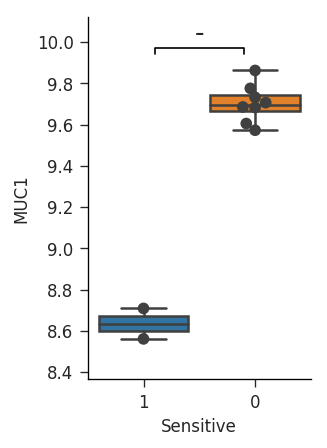

In [34]:
boxplot_with_pvalue(expression.MUC1, annotation.Sensitive)

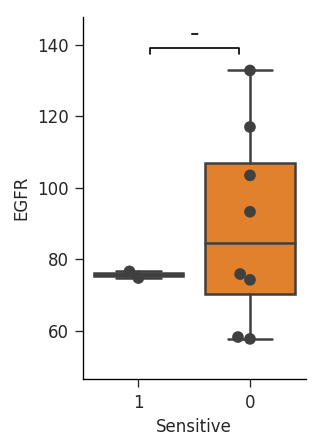

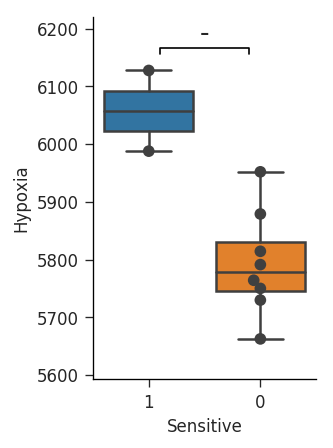

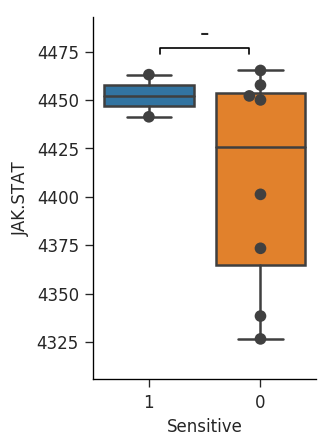

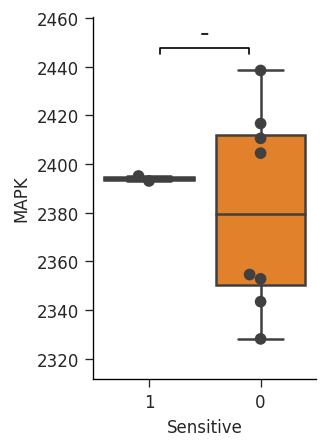

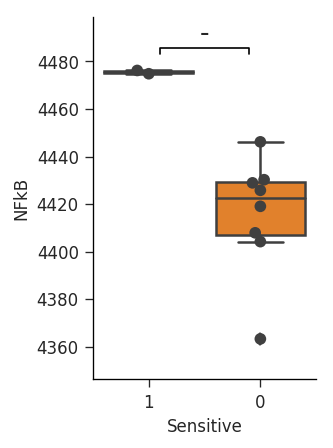

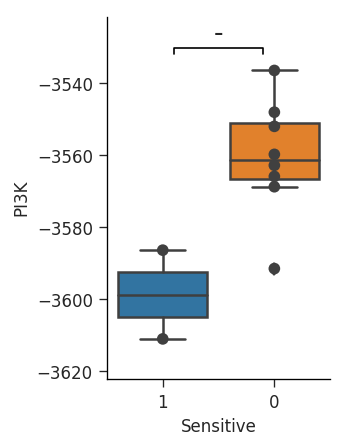

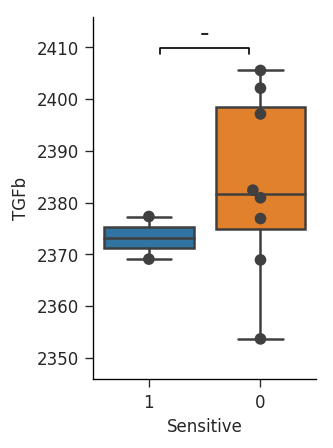

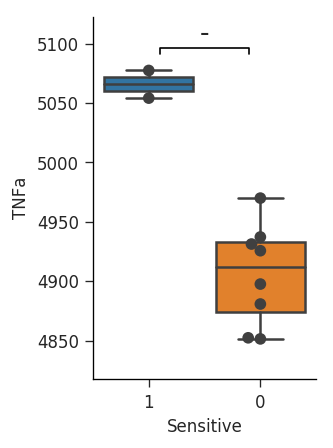

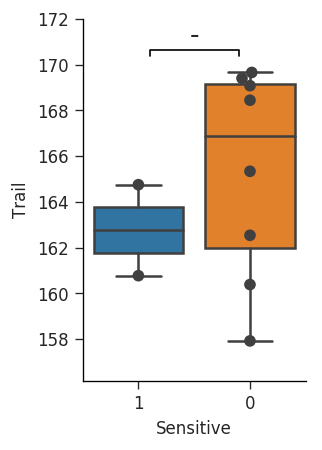

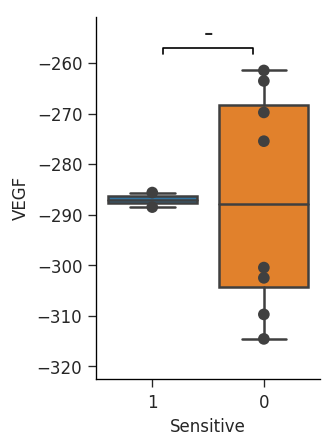

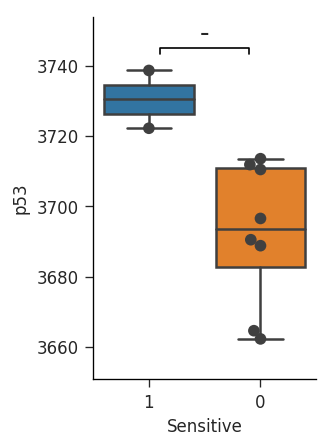

In [32]:
for i in progeny:
    boxplot_with_pvalue(progeny[i], annotation.Sensitive)

In [14]:
datasets = ['GSE5851']

In [15]:
ann_paths_d = {'GSE5851': 'Patients/GSE5851_ann_stat.tsv'}

exp_paths_d = {'GSE5851': '../DATA/Patients/GSE5851/GSE5851_GPL571_max_gs_samples.tsv'}


GSE5851


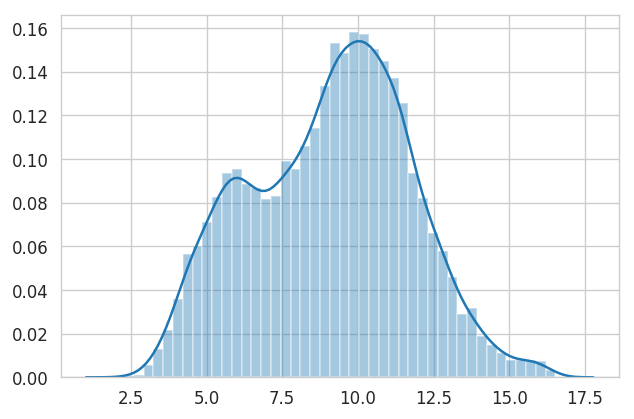

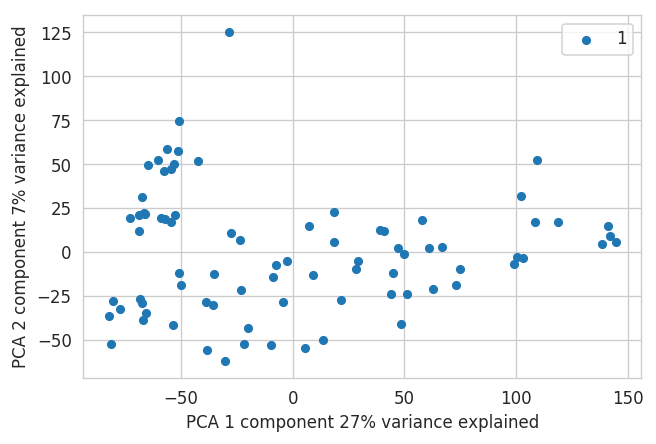

In [6]:
ann_d = {}
exp_d = {}
progeny_d = {}

for cds in datasets:
    print(cds)
    ann_d[cds] =  read_dataset(ann_paths_d[cds])
    exp_d[cds] =  read_dataset(exp_paths_d[cds]).T
    if exp_d[cds].mean().mean() > 30:
        exp_d[cds] = np.log2(exp_d[cds]+1)
    
    sns.distplot(exp_d[cds].mean())
    plt.show()
    pca_plot(exp_d[cds], exp_d[cds].index.value_counts())
    plt.show()
    
    progeny = run_progeny(exp_d[cds].T)
    progeny.index = progeny.index.str.replace('.', '-')
    progeny_sc = median_scale(progeny, 4)
    
    progeny_d[cds] = progeny_sc.copy()

In [7]:
annotation = read_dataset('../DATA/Patients/GSE5851/GSE5851_annotation.txt')

In [8]:
expression = np.log2(read_dataset('../DATA/Patients/GSE5851/GSE5851_GPL571_max_gs_samples.tsv').T+1)

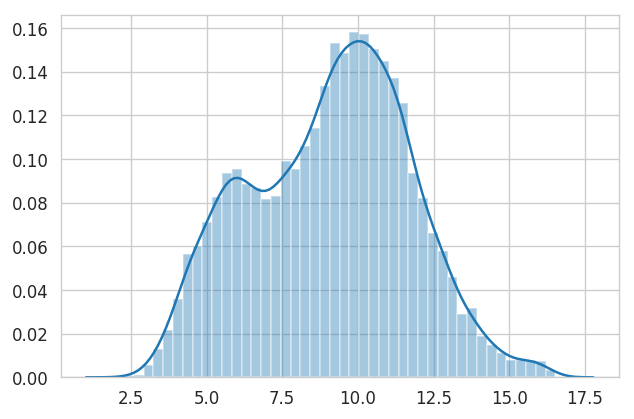

In [9]:
sns.distplot(expression.mean())

In [26]:
progeny = run_progeny(expression.T)
progeny.index = progeny.index.str.replace('.', '-')
progeny_sc = median_scale(progeny, 4)
progeny_sc.shape

(80, 11)

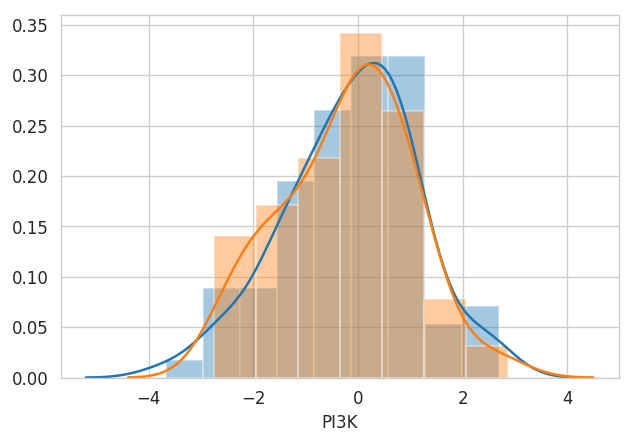

In [35]:
sns.distplot(progeny_sc.EGFR)
sns.distplot(progeny_sc.PI3K)

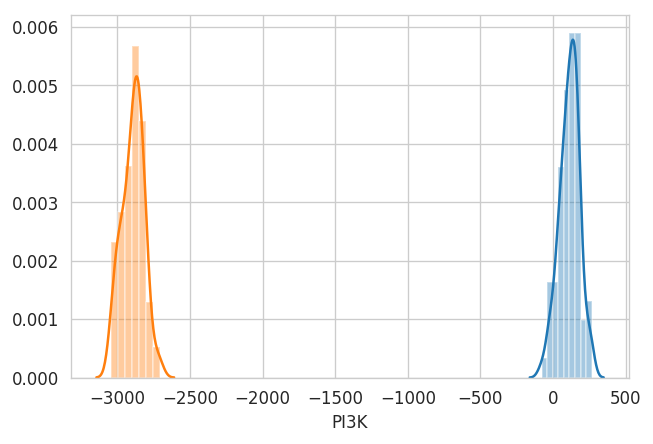

In [34]:
sns.distplot(progeny.EGFR)
sns.distplot(progeny.PI3K)

In [24]:
pfs_surv = prepare_survival_annotation(annotation.PFS, annotation.PFS_status)

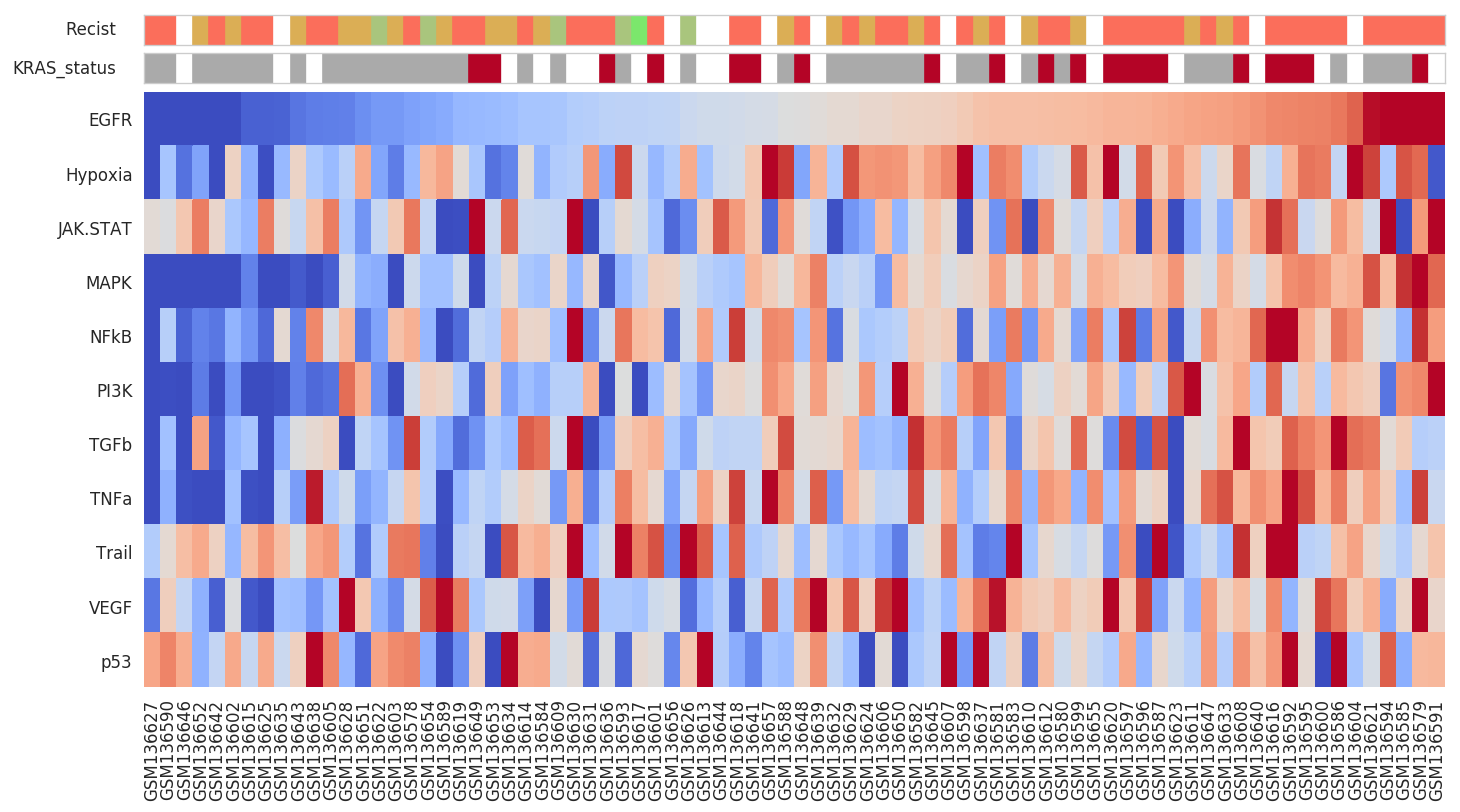

In [22]:
so = progeny_sc.EGFR.sort_values().index


af = axis_matras([.3, .3, 6], x_len=12)

ax = next(af)
line_palette_annotation_plot(annotation.Recist[so], recist_palette, ax=ax)

ax = next(af)
line_palette_annotation_plot(annotation.KRAS_status[so], {'WT': lgrey_color, 
                                                      'MUT': red_color}, ax=ax)

ax = next(af)
sns.heatmap(progeny_sc.loc[so].clip(-2, 2).T, ax=ax, cbar=False, cmap=default_cmap, yticklabels=True, xticklabels=True)

plt.tight_layout(pad=.1)
plt.show()

In [26]:
annotation

,title,metastasis_place,Patient_num,Sex,Race,Age,Recist,PFS,AffyQ_AREG_expression,AffyQ_EREG_expression,...,Epiregulin_ELISA_conc._ng/mL,qPCR_EGFR_dCt,KRAS_Mutation,Order_of_sample_on_Figure_2_graph,KRAS_status,Response,Dense_cl,MFP,CMS,PFS_status
GSM136578,045_01_01,Liver,15,MALE,BLACK/AFRICAN AMERICAN,66.0,PD,57,1084.91,622.01,...,NaN,0.4222243333,WT,26,WT,NR,Metastatic,C,CMS4,1
GSM136579,045_01_03,Rectum,27,MALE,WHITE,46.0,PD,67,1163.17,100.48,...,0.000,-0.060911,c.35G>T,27,MUT,NR,Desert,A,CMS2-3,1
GSM136580,045_01_04,Liver,61,MALE,WHITE,NaN,PD,56,162.74,71.16,...,0.338,-0.8347926667,WT,28,WT,NR,Desert,D,CMS1,1
GSM136581,045_01_05,Liver,93,MALE,WHITE,72.0,PD,59,2321.00,784.77,...,NaN,-0.1012256667,c.35G>T,29,MUT,NR,Metastatic_cold,A,CMS2-3,1
GSM136582,045_01_07,Liver,98,FEMALE,WHITE,49.0,SD,121,2615.62,1113.89,...,0.000,-0.5661543333,WT,25,WT,R,Metastatic,A,CMS4,1
GSM136584,045_01_09,Liver,41,MALE,ASIAN,62.0,SD,116,1384.71,632.61,...,0.000,-1.293232,na,9,NaN,R,Metastatic,B,CMS2-3,1
GSM136585,045_01_10,Liver,13,MALE,WHITE,70.0,PD,57,2550.49,655.04,...,0.000,-0.4008605,WT,30,WT,NR,Metastatic_cold,C,CMS2-3,1
GSM136586,045_01_11,Abdomen,103,MALE,WHITE,76.0,PD,61,1018.25,859.41,...,0.000,-0.730021,WT,31,WT,NR,Metastatic,A,CMS4,1
GSM136587,045_02_01,Liver,7,FEMALE,WHITE,52.0,PD,56,1626.87,668.84,...,4.135,1.0498903333,c.35G>T,32,MUT,NR,Metastatic,NaN,CMS4,1
GSM136588,045_02_02,Liver,97,MALE,WHITE,59.0,SD,185,1610.75,442.09,...,NaN,0.0749035,WT,24,WT,R,Metastatic_cold,D,CMS4,1


Iteration 1: norm_delta = 1.54544, step_size = 0.9500, ll = -180.45629, newton_decrement = 12.43002, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.39278, step_size = 0.9500, ll = -168.44107, newton_decrement = 0.52056, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.02103, step_size = 0.9500, ll = -167.92393, newton_decrement = 0.00219, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00115, step_size = 1.0000, ll = -167.92173, newton_decrement = 0.00001, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -167.92173, newton_decrement = 0.00000, seconds_since_start = 0.0
Convergence completed after 5 iterations.
<lifelines.CoxPHFitter: fitted with 58 observations, 0 censored>
      duration col = 'duration'
         event col = 'events'
number of subjects = 58
  number of events = 58
    log-likelihood = -167.92
  time fit was run = 2019-03-02 09:47:30 UTC

---
          coef  exp(coef)  se(coef)     z    p  -log2(p)  lower 0.95  upp

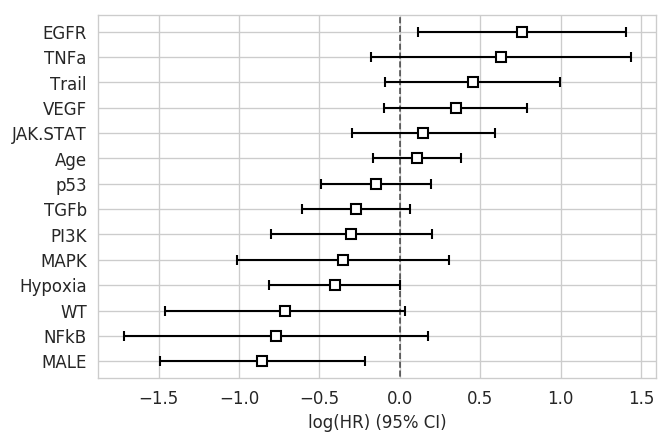

In [30]:
cph = simple_multivar_cox_reg(pfs_surv, categorical_list=[annotation.KRAS_status, annotation.Sex], 
                        numerical_list=[progeny_sc.clip(-2, 2), median_scale(annotation.Age, 2)])
cph.plot()